# Background

In [394]:
#!pip install yfinance

In [395]:
from dateutil.relativedelta import relativedelta
import datetime
import requests
import numpy as np
import pandas as pd
import yfinance as yf

# Data Input

In [396]:
#History Data Time Frame
Startdate = "2010-01-01"
Enddate = "2024-04-02"

Startdate = pd.to_datetime(Startdate)
Enddate = pd.to_datetime(Enddate)

# Risk-free Rate

In [397]:
import yfinance as yf

# Define the ticker symbols for Treasury bonds
tickers = ["^IRX", "^FVX", "^TNX", "^TYX"]  # 6-month T-bill, 5-year, 10-year, 30-year

# Fetch data
Risk_Free_Rate = yf.download(tickers, start=Startdate, end=Enddate, interval="1mo")

# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Risk_Free_Rate.columns if 'Adj Close' in col]
Risk_Free_Rate_adj_close = Risk_Free_Rate[adj_close_columns]

# Clean column names
Risk_Free_Rate_adj_close.columns = [col[1] for col in Risk_Free_Rate_adj_close.columns]
Risk_Free_Rate = Risk_Free_Rate_adj_close.reset_index()
print('Column names cleaned and DataFrame reset.')

[*********************100%%**********************]  4 of 4 completed

Column names cleaned and DataFrame reset.


In [398]:
Risk_Free_Rate = Risk_Free_Rate.rename(columns = {"^IRX": "TB13W", "^FVX": "TB5", "^TNX": "TB10", "^TYX": "TB30"})
Risk_Free_Rate["Date"] = pd.to_datetime(Risk_Free_Rate["Date"])
Risk_Free_Rate.iloc[:, 1:] = Risk_Free_Rate.iloc[:, 1:]/100
Risk_Free_Rate = Risk_Free_Rate[['Date', 'TB13W', 'TB5', 'TB10', 'TB30']]

In [399]:
Risk_Free_Rate.head()

,Date,TB13W,TB5,TB10,TB30
0,2010-01-01,0.00070,0.02348,0.03609,0.04510
1,2010-02-01,0.00115,0.02284,0.03595,0.04529
2,2010-03-01,0.00150,0.02560,0.03833,0.04715
3,2010-04-01,0.00155,0.02420,0.03663,0.04527
4,2010-05-01,0.00150,0.02097,0.03301,0.04214


<ipython-input-400-d2125d242746>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(["fivethirtyeight", "seaborn-darkgrid"])


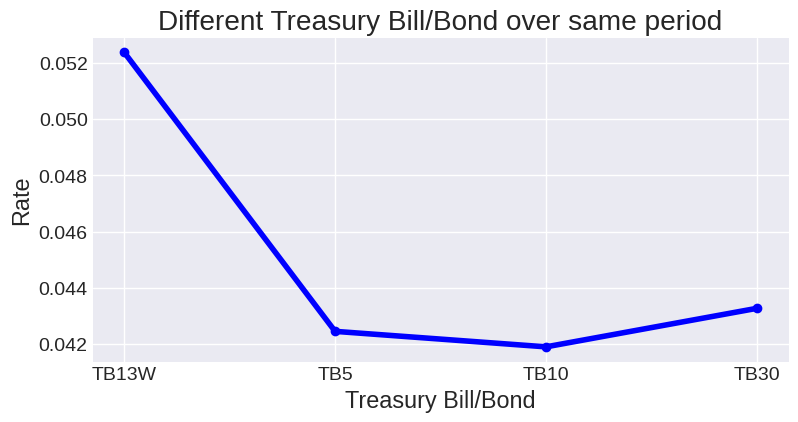

In [400]:
import matplotlib.pyplot as plt
plt.style.use(["fivethirtyeight", "seaborn-darkgrid"])

Moving = 6

# Chart of cost of equity for each year for Amazon stock graphically represented from 2002 to 2022
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 4)

# Single row data
Treasury = Risk_Free_Rate.tail(12).mean()

# Plotting a line connecting the dots
axes.plot(Treasury.index[1:], Treasury.values[1:], color='blue', linestyle='-', marker='o')

axes.set_xlabel('Treasury Bill/Bond')
axes.set_ylabel('Rate')
axes.set_title('Different Treasury Bill/Bond over same period')
axes.legend()
plt.show()

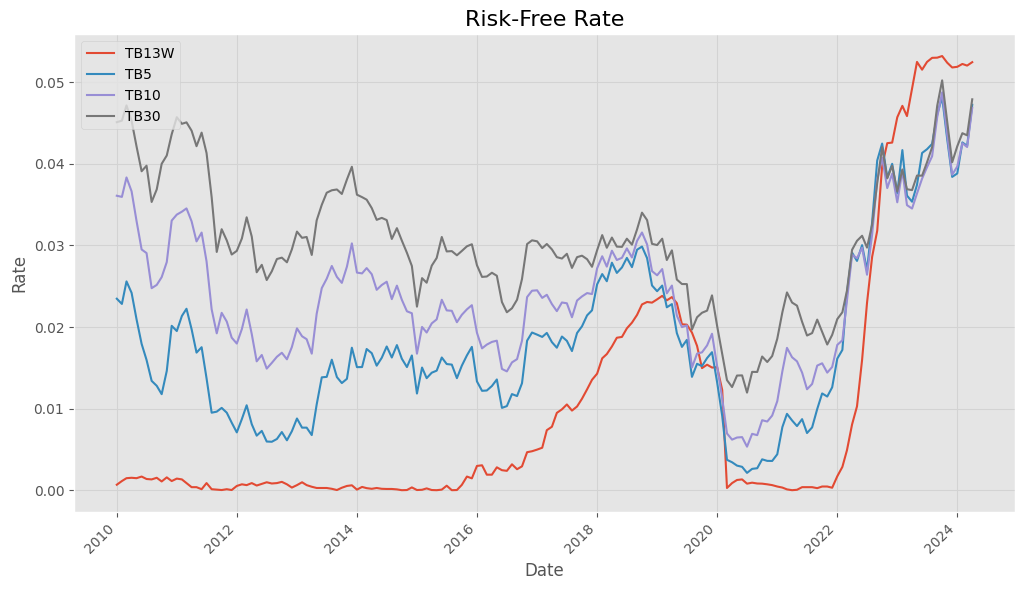

In [401]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("ggplot")

# Chart of cost of equity for each year for Amazon stock graphically represented from 2002 to 2022
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(12, 6)

for bond in Risk_Free_Rate.iloc[:, 1:].columns:
    axes.plot(Risk_Free_Rate["Date"], Risk_Free_Rate[bond], label=bond)

axes.set(title="Risk-Free Rate", xlabel="Date", ylabel="Rate")
axes.title.set_size(16)
plt.grid(color="lightgray")
fig.autofmt_xdate(rotation=45)  # format x-axis as date, rotate 45 degrees
# axes.set_facecolor('black') #make background behind grid whiteaxes[0].legend([Trade_Name +" Cost of Equity"] ,loc = 2) #move legend to right
fig.tight_layout()  # use tight layout
axes.legend(loc=2)  # move legend to upper left
fig.subplots_adjust(right=0.85)  # adjust subplots to make legend fit, adjusted this a bit from smaller figure example!
axes.grid(color="lightgray")
plt.show()

# Index

In [402]:
import yfinance as yf

# Define the ticker symbols for Treasury bonds
tickers = ["^IXIC", "^DJI", "^GSPC"]  # NASDAQ, Dow Jones, S%P 500

# Fetch data
Index = yf.download(tickers, start=Startdate - pd.DateOffset(months=1), end=Enddate, interval="1mo")

# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Index.columns if 'Adj Close' in col]
Index_adj_close = Index[adj_close_columns]

# Clean column names
Index_adj_close.columns = [col[1] for col in Index_adj_close.columns]
Index = Index_adj_close.reset_index()
print('Column names cleaned and DataFrame reset.')

[*********************100%%**********************]  3 of 3 completed

Column names cleaned and DataFrame reset.


In [403]:
Index = Index.rename(columns = {"^IXIC": "NASDAQ", "^DJI":"Dow Jones", "^GSPC":"S&P 500"})
Index["Date"] = pd.to_datetime(Index["Date"])
Index.iloc[:, 1:] = Index.iloc[:, 1:].apply(lambda x: pd.to_numeric(x, errors='coerce').pct_change().replace(np.nan, 0).replace(np.inf, ""), axis=0)
Index = Index.dropna()

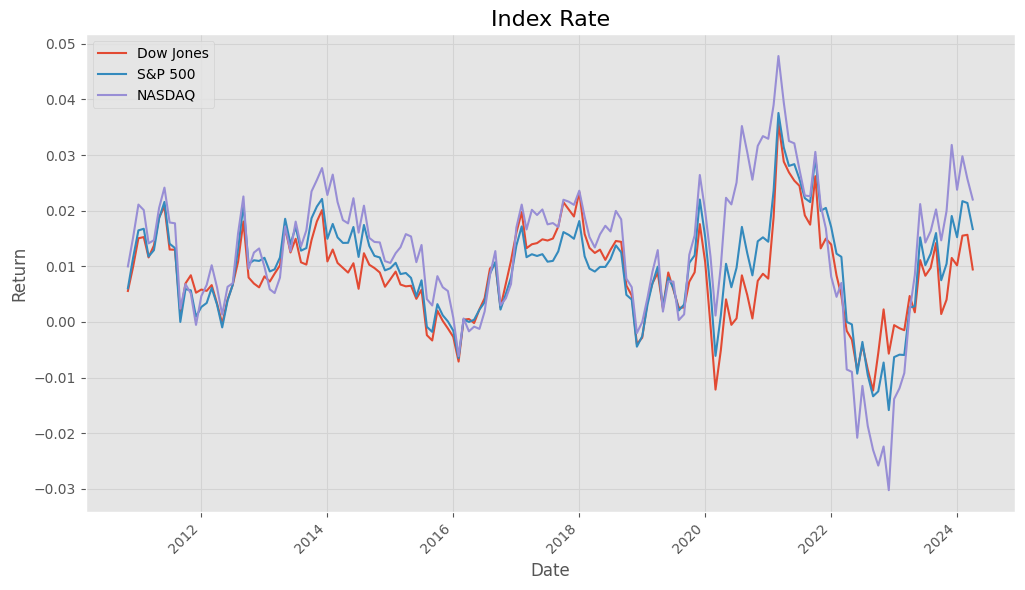

In [404]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Chart of cost of equity for each year for Amazon stock graphically represented from 2002 to 2022
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(12, 6)

Moving = 12

for index in Index.iloc[:, 1:].columns:
    axes.plot(Index["Date"], Index[index].rolling(Moving).mean(), label=index)

axes.set(title="Index Rate", xlabel="Date", ylabel="Return")
axes.title.set_size(16)
plt.grid(color="lightgray")
fig.autofmt_xdate(rotation=45)  # format x-axis as date, rotate 45 degrees
# axes.set_facecolor('black') #make background behind grid whiteaxes[0].legend([Trade_Name +" Cost of Equity"] ,loc = 2) #move legend to right
fig.tight_layout()  # use tight layout
axes.legend(loc=2)  # move legend to upper left
fig.subplots_adjust(right=0.85)  # adjust subplots to make legend fit, adjusted this a bit from smaller figure example!
axes.grid(color="lightgray")
plt.show()

In [405]:
Index_Investment = Index.copy()
Index_Investment.iloc[:, 1:] = Index_Investment.iloc[:, 1:].apply(lambda x: (1+x).cumprod()*1000)

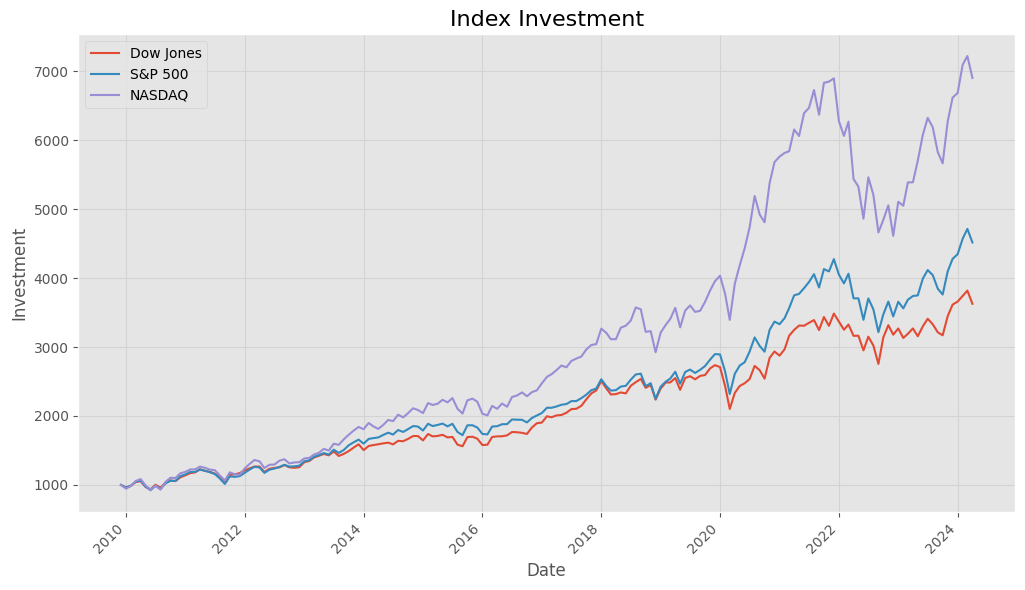

In [406]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Chart of cost of equity for each year for Amazon stock graphically represented from 2002 to 2022
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(12, 6)

for index in Index_Investment.iloc[:, 1:].columns:
    axes.plot(Index_Investment["Date"], Index_Investment[index], label=index)

axes.set(title="Index Investment", xlabel="Date", ylabel="Investment")
axes.title.set_size(16)
plt.grid(color="lightgray")
fig.autofmt_xdate(rotation=45)  # format x-axis as date, rotate 45 degrees
# axes.set_facecolor('black') #make background behind grid whiteaxes[0].legend([Trade_Name +" Cost of Equity"] ,loc = 2) #move legend to right
fig.tight_layout()  # use tight layout
axes.legend(loc=2)  # move legend to upper left
fig.subplots_adjust(right=0.85)  # adjust subplots to make legend fit, adjusted this a bit from smaller figure example!
axes.grid(color="lightgray")
plt.show()

# Stock/ETF

## Stock Return without Highlight

In [407]:
import yfinance as yf

# Define the ticker symbols

tickers = ["AAPL" ,"AMZN", "XOM", "GOOG", "META", "MSFT", "NVDA", "TSLA", "UNH", "CVS", "MNST", "BRK-B"]

# Fetch date
Stock = yf.download(tickers, start=Startdate - pd.DateOffset(months=1), end=Enddate, interval="1mo")

# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Stock.columns if 'Adj Close' in col]
Stock_adj_close = Stock[adj_close_columns]

# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Stock.columns if 'Close' in col]
Stock_adj_close = Stock[adj_close_columns]

# Clean column names
Stock_adj_close.columns = [col[1] for col in Stock_adj_close.columns]
Stock = Stock_adj_close.reset_index()
Stock = Stock.fillna("")
print('\nColumn names cleaned and DataFrame reset.')


[*********************100%%**********************]  12 of 12 completed


Column names cleaned and DataFrame reset.


In [408]:
Stock["Date"] = pd.to_datetime(Stock["Date"])
Stock.iloc[:, 1:] = Stock.iloc[:, 1:].apply(lambda x: pd.to_numeric(x, errors='coerce').pct_change().replace(np.nan, 0).replace(np.inf, ""), axis=0)
Stock = Stock[1:]

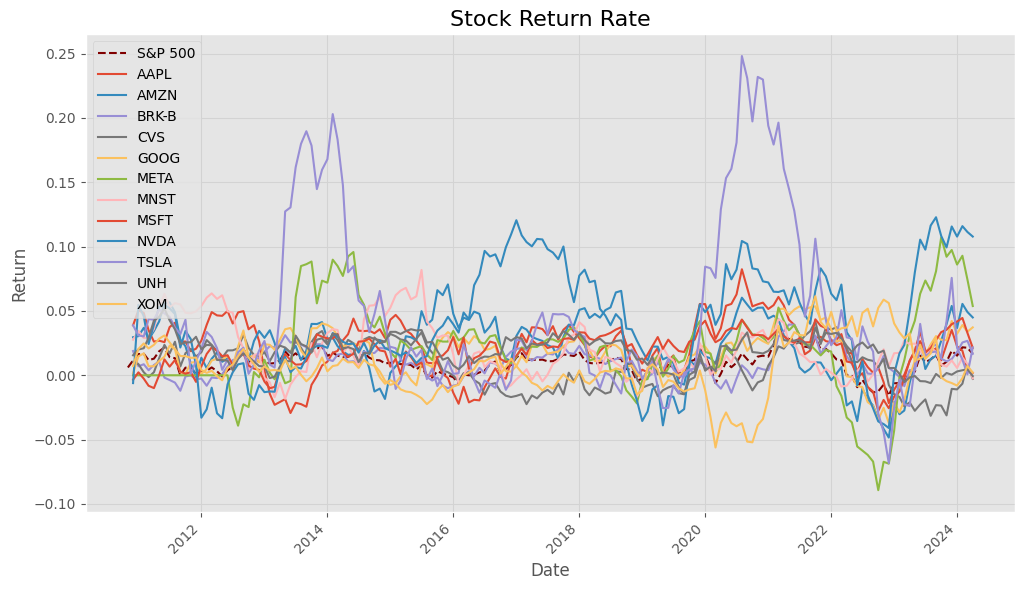

In [409]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Chart of cost of equity for each year for Amazon stock graphically represented from 2002 to 2022
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(12, 6)

Moving = 12

#Change to other Index if Needed
axes.plot(Index["Date"], Index["S&P 500"].rolling(Moving).mean(), label="S&P 500", color = "maroon", linestyle="--")

for stock in Stock.iloc[:, 1:].columns:
    axes.plot(Stock["Date"], Stock[stock].rolling(Moving).mean(), label=stock if len(tickers) > 1 else tickers[0])

axes.set(title="Stock Return Rate", xlabel="Date", ylabel="Return")
axes.title.set_size(16)
plt.grid(color="lightgray")
fig.autofmt_xdate(rotation=45)  # format x-axis as date, rotate 45 degrees
# axes.set_facecolor('black') #make background behind grid whiteaxes[0].legend([Trade_Name +" Cost of Equity"] ,loc = 2) #move legend to right
fig.tight_layout()  # use tight layout
axes.legend(loc=2)  # move legend to upper left
fig.subplots_adjust(right=0.85)  # adjust subplots to make legend fit, adjusted this a bit from smaller figure example!
axes.grid(color="lightgray")
plt.show()

In [410]:
Stock_Investment = Stock.copy()
Stock_Investment.iloc[:, 1:] = Stock_Investment.iloc[:, 1:].apply(lambda x: (1+x).cumprod()*1000)

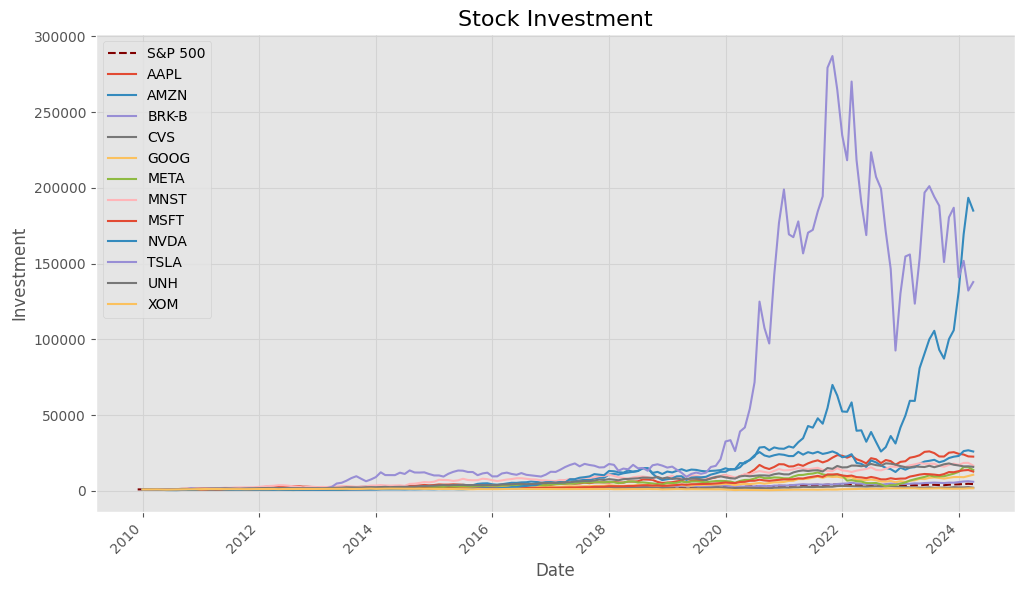

In [411]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(12, 6)

#Change to other Index if Needed
axes.plot(Index_Investment["Date"], Index_Investment["S&P 500"], label="S&P 500", color = "maroon", linestyle="--")

for stock in Stock_Investment.iloc[:, 1:].columns:
    axes.plot(Stock_Investment["Date"], Stock_Investment[stock], label=stock if len(tickers) > 1 else tickers[0])

axes.set(title="Stock Investment", xlabel="Date", ylabel="Investment")
axes.title.set_size(16)
plt.grid(color="lightgray")
fig.autofmt_xdate(rotation=45)  # format x-axis as date, rotate 45 degrees
# axes.set_facecolor('black') #make background behind grid whiteaxes[0].legend([Trade_Name +" Cost of Equity"] ,loc = 2) #move legend to right
fig.tight_layout()  # use tight layout
axes.legend(loc=2)  # move legend to upper left
fig.subplots_adjust(right=0.85)  # adjust subplots to make legend fit, adjusted this a bit from smaller figure example!
axes.grid(color="lightgray")
plt.show()

## Stock/Return With Highlight

In [412]:
# Define the ticker symbols
tickers_highlight = ["XOM"]

tickers_no_hightlight = ["AAPL" ,"AMZN", "CVX", "GOOG", "META", "MSFT", "NVDA", "TSLA", "UNH", "CVS","BRK-B"]

In [413]:
import yfinance as yf

# Fetch date
Stock_highlight = yf.download(tickers_highlight, start=Startdate - pd.DateOffset(months=1), end=Enddate, interval="1mo")
Stock_no_highlight = yf.download(tickers_no_hightlight, start=Startdate - pd.DateOffset(months=1), end=Enddate, interval="1mo")

# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Stock_highlight.columns if 'Adj Close' in col]
Stock_highlight_adj_close = Stock_highlight[adj_close_columns]

# Clean column names
Stock_highlight_adj_close.columns = [col[1] for col in Stock_highlight_adj_close.columns]
Stock_highlight = Stock_highlight_adj_close.reset_index()
Stock_highlight = Stock_highlight.fillna("")
print('\nColumn names cleaned and DataFrame reset.')

# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Stock_no_highlight.columns if 'Adj Close' in col]
Stock_no_highlight_adj_close = Stock_no_highlight[adj_close_columns]

# Clean column names
Stock_no_highlight_adj_close.columns = [col[1] for col in Stock_no_highlight_adj_close.columns]
Stock_no_highlight = Stock_no_highlight_adj_close.reset_index()
Stock_no_highlight = Stock_no_highlight.fillna("")
print('Column names cleaned and DataFrame reset.')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  11 of 11 completed



Column names cleaned and DataFrame reset.
Column names cleaned and DataFrame reset.


In [414]:
Stock_highlight["Date"] = pd.to_datetime(Stock_highlight["Date"])
Stock_highlight.iloc[:, 1:] = Stock_highlight.iloc[:, 1:].apply(lambda x: pd.to_numeric(x, errors='coerce').pct_change().replace(np.nan, 0).replace(np.inf, ""), axis=0)
Stock_highlight = Stock_highlight[1:]
Stock_no_highlight["Date"] = pd.to_datetime(Stock_no_highlight["Date"])
Stock_no_highlight.iloc[:, 1:] = Stock_no_highlight.iloc[:, 1:].apply(lambda x: pd.to_numeric(x, errors='coerce').pct_change().replace(np.nan, 0).replace(np.inf, ""), axis=0)
Stock_no_highlight = Stock_no_highlight[1:]

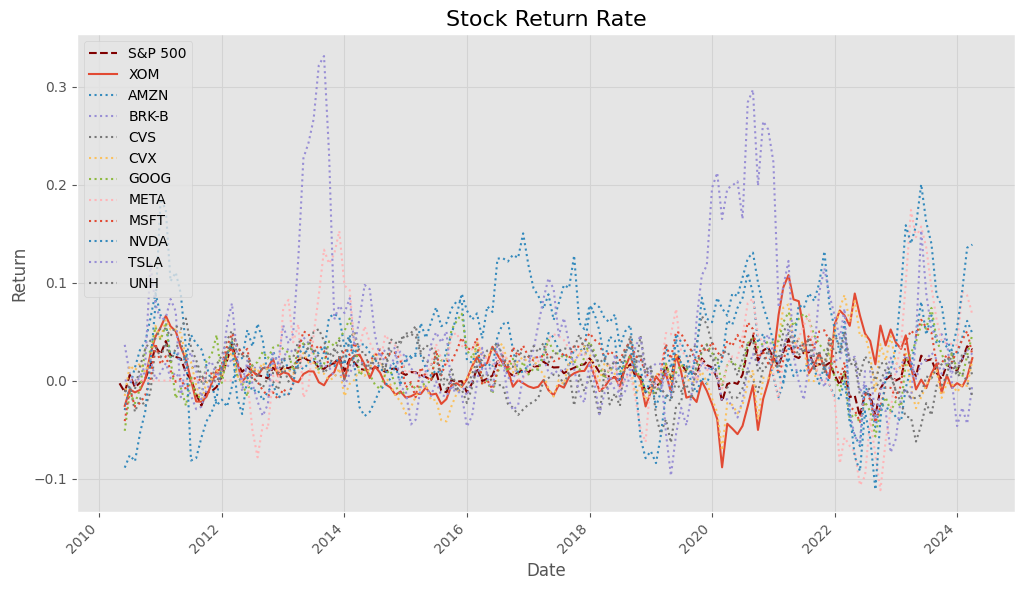

In [415]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(12, 6)

Moving = 6

# Plot S&P 500 with dashed line
axes.plot(Index["Date"], Index["S&P 500"].rolling(Moving).mean(), label="S&P 500", color="maroon", linestyle="--")

# Plot highlighted stocks
for stock in Stock_highlight.iloc[:, 1:].columns:
    axes.plot(Stock_highlight["Date"], Stock_highlight[stock].rolling(Moving).mean(), label=stock if len(tickers_highlight) > 1 else tickers_highlight[0])

# Plot other stocks
for stock in Stock_no_highlight_adj_close.iloc[:, 1:].columns:
    axes.plot(Stock_no_highlight["Date"], Stock_no_highlight[stock].rolling(Moving).mean(), label=stock if len(Stock_no_highlight) > 1 else Stock_no_highlight[0], linestyle=":"),#color=(0.8, 0.8, 0.8))

axes.set(title="Stock Return Rate", xlabel="Date", ylabel="Return")
axes.title.set_size(16)
plt.grid(color="lightgray")
fig.autofmt_xdate(rotation=45)  # format x-axis as date, rotate 45 degrees
fig.tight_layout()  # use tight layout
axes.legend(loc="upper left")  # move legend to upper left
fig.subplots_adjust(right=0.85)  # adjust subplots to make legend fit, adjusted this a bit from smaller figure example!
axes.grid(color="lightgray")
plt.show()


In [416]:
Stock_to_highlight_Investment = Stock_highlight.copy()
Stock_to_highlight_Investment.iloc[:, 1:] = Stock_to_highlight_Investment.iloc[:, 1:].apply(lambda x: (1+x).cumprod()*1000)
Stock_no_highlight_Investment = Stock_no_highlight.copy()
Stock_no_highlight_Investment.iloc[:, 1:] = Stock_no_highlight_Investment.iloc[:, 1:].apply(lambda x: (1+x).cumprod()*1000)

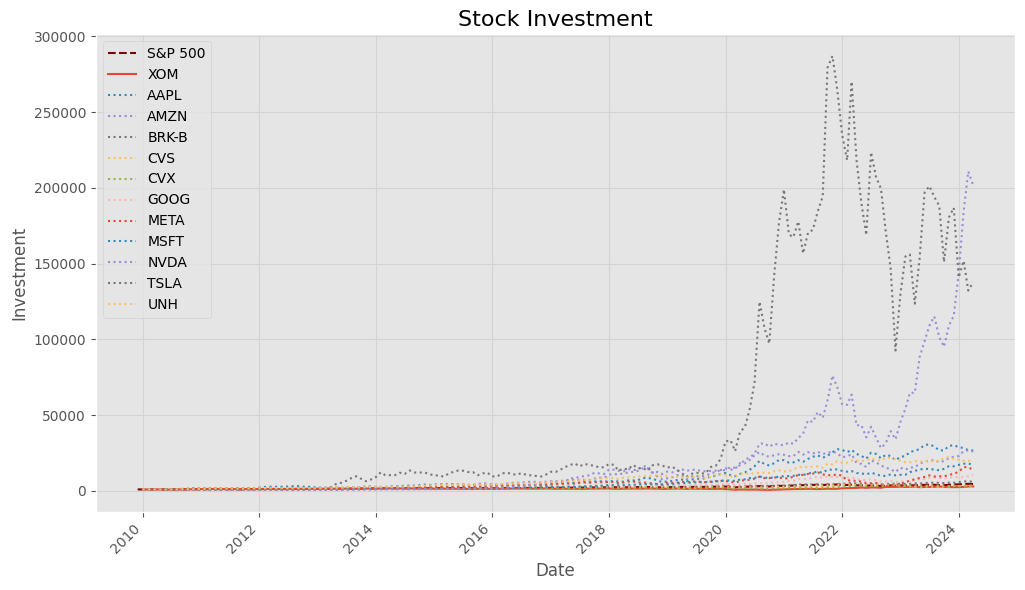

In [417]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Chart of cost of equity for each year for Amazon stock graphically represented from 2002 to 2022
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(12, 6)

#Change to other Index if Needed
axes.plot(Index_Investment["Date"], Index_Investment["S&P 500"], label="S&P 500", color = "maroon", linestyle="--")

for stock in Stock_to_highlight_Investment.iloc[:, 1:].columns:
    axes.plot(Stock_to_highlight_Investment["Date"], Stock_to_highlight_Investment[stock], label=stock if len(tickers_highlight) > 1 else tickers_highlight[0])

for stock in Stock_no_highlight_Investment.iloc[:, 1:].columns:
    axes.plot(Stock_no_highlight_Investment["Date"], Stock_no_highlight_Investment[stock], label=stock if len(Stock_no_highlight) > 1 else Stock_no_highlight[0], linestyle=":")#color=(0.8, 0.8, 0.8))

axes.set(title="Stock Investment", xlabel="Date", ylabel="Investment")
axes.title.set_size(16)
plt.grid(color="lightgray")
fig.autofmt_xdate(rotation=45)  # format x-axis as date, rotate 45 degrees
# axes.set_facecolor('black') #make background behind grid whiteaxes[0].legend([Trade_Name +" Cost of Equity"] ,loc = 2) #move legend to right
fig.tight_layout()  # use tight layout
axes.legend(loc=2)  # move legend to upper left
fig.subplots_adjust(right=0.85)  # adjust subplots to make legend fit, adjusted this a bit from smaller figure example!
axes.grid(color="lightgray")
plt.show()